In [1]:
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test) = load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [11]:
x_test.shape

(10000, 28, 28, 1)

In [12]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

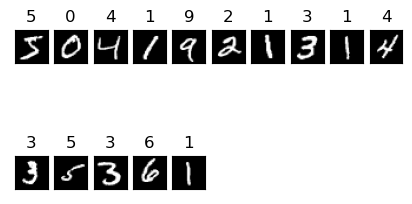

In [14]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
  ax = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]),cmap='gray')
  ax.set_title(y_train[i])


In [15]:
import tensorflow as tf

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape = (28,28,1),filters=32,kernel_size=(5,5),strides=(1,1),padding='same',data_format='channels_last',name='conv1',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),name='pool_1'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),padding='same',name='conv2',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),name='pool_2'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024,name='fc_1',activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=10,name='fc_2',activation='softmax'))

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(x_train,y_train,epochs = 10,validation_split=0.1,batch_size=100,verbose=1)

Epoch 1/10
540/540 [==============================] - 69s 126ms/step - loss: 0.1520 - accuracy: 0.9529 - val_loss: 0.0447 - val_accuracy: 0.9878
Epoch 2/10
540/540 [==============================] - 64s 119ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0386 - val_accuracy: 0.9868
Epoch 3/10
540/540 [==============================] - 70s 129ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0358 - val_accuracy: 0.9903
Epoch 4/10
540/540 [==============================] - 70s 130ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0334 - val_accuracy: 0.9913
Epoch 5/10
540/540 [==============================] - 66s 122ms/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0289 - val_accuracy: 0.9918
Epoch 6/10
540/540 [==============================] - 67s 125ms/step - loss: 0.0160 - accuracy: 0.9945 - val_loss: 0.0327 - val_accuracy: 0.9913
Epoch 7/10
540/540 [==============================] - 67s 123ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0379 - val_ac

In [19]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f'Accuracy:{accuracy*100}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0283 - accuracy: 0.9930
Accuracy:99.29999709129333


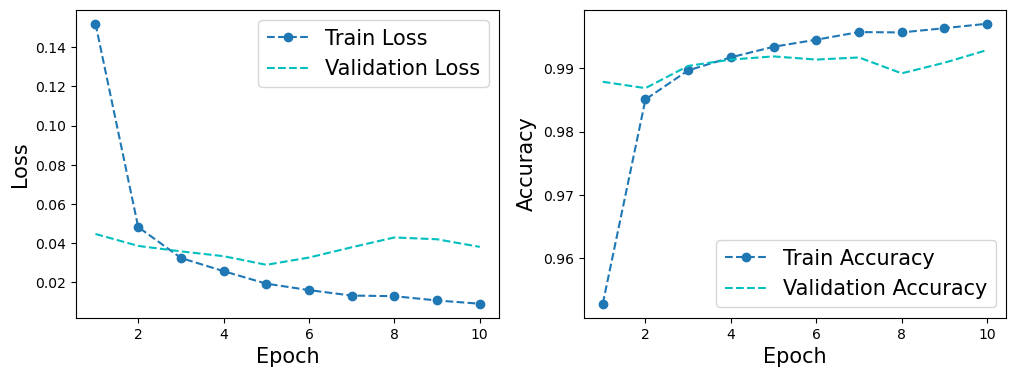

In [20]:
hist = history.history
x_arr = np.arange(len(hist['loss']))+1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist['loss'],'--o',label='Train Loss')
ax.plot(x_arr,hist['val_loss'],'--c',label='Validation Loss')
ax.set_xlabel('Epoch',size=15)
ax.set_ylabel('Loss',size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist['accuracy'],'--o',label='Train Accuracy')
ax.plot(x_arr,hist['val_accuracy'],'--c',label='Validation Accuracy')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size=15)
ax.set_ylabel('Accuracy',size=15)
plt.show()

In [21]:
image = x_train[6]


In [22]:
image.shape

(28, 28, 1)

In [23]:
image.shape[0]

28

In [24]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])

In [25]:
image.shape

(1, 28, 28, 1)

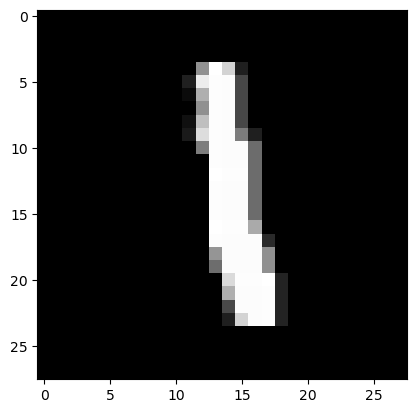

In [26]:
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [27]:
predicted = model.predict([image])
print('predicted:{}'.format(argmax(predicted)))

1/1 [==============================] - 0s 104ms/step
predicted:1


In [28]:
predicted

array([[3.3135072e-12, 1.0000000e+00, 2.1563933e-10, 3.9072115e-14,
        8.2071516e-10, 7.8846972e-12, 1.3310790e-11, 1.0993390e-08,
        6.5578765e-11, 6.7718685e-11]], dtype=float32)